In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
pd.options.display.max_columns = 999

In [3]:
import time
start_time = time.time()

In [4]:
plt.rcParams['figure.figsize'] = [15, 15]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

In [5]:
darfur = pd.read_csv('darfur/darfur_out.csv')

In [6]:
darfur

,Unnamed: 0,movement,date,latitude,longitude
0,25,1,2008-01-16,12.950000,22.866670
1,28,1,2008-01-19,13.602467,26.691151
2,30,1,2008-01-20,12.899989,23.481064
3,42,1,2008-01-23,12.289150,22.467033
4,116,1,2008-02-28,13.441266,22.445404
...,...,...,...,...,...
142,2621,1,2009-03-21,13.633123,22.500000
143,2633,1,2009-03-21,12.540833,23.268383
144,2645,1,2009-03-22,13.665130,25.346891
145,2729,1,2009-03-29,13.766854,22.166906


In [7]:
darfur.date.min(),darfur.date.max()

('2008-01-16', '2009-04-04')

In [8]:
darfur_movement = darfur[darfur.movement==1]

In [9]:
acled5 = pd.read_excel('darfur/acled5.xlsx')

/Users/mihaicroicu/miniconda3/envs/nver/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [10]:
acled5m = pd.read_excel('darfur/acled_monadic.xlsx')

In [11]:
acled5['EVENT_TYPE'].unique()

array(['Violence against civilians', 'Remote violence',
       'Battle-No change of territory', 'Riots/Protests',
       'Battle-Government regains territory',
       'Non-violent activity by a conflict actor',
       'Non-violent transfer of territory',
       'Headquarters or base established',
       'Battle-Non-state actor overtakes territory'], dtype=object)

In [12]:
acled5_subset = acled5[(acled5.EVENT_TYPE == 'Non-violent activity by a conflict actor') | (
                       acled5.EVENT_TYPE == 'Non-violent transfer of territory') | (
                       acled5.EVENT_TYPE == 'Headquarters or base established')
            ]

In [13]:
acled5_subset = acled5_subset[(acled5_subset.YEAR.isin([2008,2009])) & (acled5_subset.COUNTRY.str.contains('sudan',case=False))]
acled5_subset = acled5_subset[acled5_subset.EVENT_DATE<'2009-04-10']

In [14]:
acled5_subset

,GWNO,EVENT_ID_CNTY,EVENT_ID_NO_CNTY,EVENT_DATE,YEAR,TIME_PRECISION,EVENT_TYPE,ACTOR1,ALLY_ACTOR_1,INTER1,ACTOR2,ALLY_ACTOR_2,INTER2,INTERACTION,COUNTRY,ADMIN1,ADMIN2,ADMIN3,LOCATION,LATITUDE,LONGITUDE,GEO_PRECIS,SOURCE,NOTES,FATALITIES
82533,625,2228SUD,82534,2008-01-09,2008,1,Headquarters or base established,JEM: Justice and Equality Movement,SLM/A: Sudan Liberation Movement/Army,2,NaN,NaN,0,20,Sudan,Darfur,West Darfur,Al Geneina,El Geneina,13.450000,22.450000,2,"BBC Monitoring, Al-Ayyam; BBCMEP0020080109e419...",1. The coordinates of Geneina were used. 2. BB...,0.0
82542,625,2237SUD,82543,2008-01-17,2008,1,Non-violent activity by a conflict actor,JEM: Justice and Equality Movement,SLM/A: Sudan Liberation Movement/Army,2,NaN,NaN,0,20,Sudan,Darfur,North Darfur,Al Fasher,Al Fasher,13.633333,25.350000,3,"BBC Monitoring, Sudan Tribune, Agence France P...",1. JEM told Darfur envoys it is willing to mee...,0.0
82545,625,2240SUD,82546,2008-01-18,2008,1,Non-violent activity by a conflict actor,SLM/A-Wahid: Sudan Liberation Movement/Army (A...,NaN,2,NaN,NaN,0,20,Sudan,Darfur,North Darfur,Mellit,North Darfur,16.066667,25.466667,3,AllAfrica; AFNWS00020080118e41i001me,1. UN Special Envoy Jan Eliasson and AU counte...,0.0
82549,625,2244SUD,82550,2008-01-31,2008,1,Non-violent activity by a conflict actor,LRA: Lord's Resistance Army,NaN,2,NaN,NaN,0,20,Sudan,Equatoria,Central Equatoria,Nahr Yei,Morobo,3.691900,30.776300,1,"BBC Monitoring Middle East, 01 Feb 2008 BBCMEP...",LRA moving from Morobo to Tore in S. Sudan.,0.0
82563,625,2258SUD,82564,2008-02-10,2008,2,Non-violent activity by a conflict actor,JEM-PF: Justice and Equality Movement (Peace F...,NaN,2,NaN,NaN,0,20,Sudan,Blue Nile,Gezira,North al Gazera,Adilah,14.870000,33.226000,1,"BBC Monitoring, Al-Sahafah; BBCMEP0020080210e4...",1. Authorities arrested 50 members of Justice ...,0.0
82642,625,2338SUD,82644,2008-05-01,2008,1,Non-violent activity by a conflict actor,Military Forces of Sudan (1989-),NaN,1,Military Forces of Southern Sudan (2005-2011),NaN,1,11,Sudan,Kordofan,South Kordufan,Abyei,Abyei,9.595247,28.434934,1,Reuters Alertnet,Both SAF and SPLA/M have agreed to withdraw fr...,0.0
82652,625,2344SUD,82650,2008-05-04,2008,1,Non-violent activity by a conflict actor,SLM/A-Unity: Sudan Liberation Movement/Army (U...,NaN,2,NaN,NaN,0,20,Sudan,Darfur,North Darfur,Mellit,North Darfur,16.066667,25.466667,3,"BBC Monitoring, Sudanese Media Center; BBCMEP0...",1. The coordinates for Northern Darfur were us...,0.0
82685,625,2380SUD,82686,2008-06-04,2008,1,Non-violent activity by a conflict actor,Military Forces of Sudan (1989-),NaN,1,Military Forces of Southern Sudan (2005-2011),NaN,1,11,Sudan,Kordofan,South Kordufan,Abyei,Abyei,9.595247,28.434934,1,Agence France Presse,The Governments of Sudan and Southern Sudan ha...,0.0
82686,625,2381SUD,82687,2008-06-04,2008,1,Non-violent activity by a conflict actor,Unidentified Armed Group (Sudan),NaN,3,NaN,NaN,0,30,Sudan,Kordofan,South Kordufan,Abyei,Abyei,9.595247,28.434934,1,Reuters,One more of four Indian oil technicians who we...,0.0
82689,625,2382SUD,82688,2008-06-05,2008,1,Non-violent activity by a conflict actor,Military Forces of Sudan (1989-),NaN,1,LRA: Lord's Resistance Army,NaN,2,12,Sudan,Equatoria,Central Equatoria,Bahr al Jabal,Juba,4.851650,31.582470,1,Agence France Presse,"The GoS has stated, along with Uganda and the ...",0.0


In [15]:
acled5_subset.to_csv('Darfur/acled_events_recode.csv')

In [16]:
#!open Darfur

In [17]:
acled5_subset = pd.read_csv('Darfur/acled_events_recoded.csv')

In [18]:
acled5_subset = acled5_subset[acled5_subset.RECODE==1]

In [19]:
acled5_subset

,Unnamed: 0,GWNO,EVENT_ID_CNTY,EVENT_ID_NO_CNTY,EVENT_DATE,YEAR,TIME_PRECISION,EVENT_TYPE,ACTOR1,ALLY_ACTOR_1,INTER1,ACTOR2,ALLY_ACTOR_2,INTER2,INTERACTION,COUNTRY,ADMIN1,ADMIN2,ADMIN3,LOCATION,LATITUDE,LONGITUDE,GEO_PRECIS,SOURCE,NOTES,FATALITIES,RECODE
0,82533,625,2228SUD,82534,2008-01-09,2008,1,Headquarters or base established,JEM: Justice and Equality Movement,SLM/A: Sudan Liberation Movement/Army,2,NaN,NaN,0,20,Sudan,Darfur,West Darfur,Al Geneina,El Geneina,13.450000,22.450000,2,"BBC Monitoring, Al-Ayyam; BBCMEP0020080109e419...",1. The coordinates of Geneina were used. 2. BB...,0,1
3,82549,625,2244SUD,82550,2008-01-31,2008,1,Non-violent activity by a conflict actor,LRA: Lord's Resistance Army,NaN,2,NaN,NaN,0,20,Sudan,Equatoria,Central Equatoria,Nahr Yei,Morobo,3.691900,30.776300,1,"BBC Monitoring Middle East, 01 Feb 2008 BBCMEP...",LRA moving from Morobo to Tore in S. Sudan.,0,1
5,82642,625,2338SUD,82644,2008-05-01,2008,1,Non-violent activity by a conflict actor,Military Forces of Sudan (1989-),NaN,1,Military Forces of Southern Sudan (2005-2011),NaN,1,11,Sudan,Kordofan,South Kordufan,Abyei,Abyei,9.595247,28.434934,1,Reuters Alertnet,Both SAF and SPLA/M have agreed to withdraw fr...,0,1
10,82690,625,2385SUD,82691,2008-06-06,2008,1,Non-violent activity by a conflict actor,LRA: Lord's Resistance Army,NaN,2,NaN,NaN,0,20,Sudan,Equatoria,Central Equatoria,Kajo Kaii,Kajo Kaji,3.883300,31.666600,1,BBC Monitoring,LRA said to be moving toward Kajo-Keji,0,1
11,82701,625,2396SUD,82702,2008-06-15,2008,1,Non-violent activity by a conflict actor,Military Forces of Sudan (1989-),NaN,1,Military Forces of Southern Sudan (2005-2011),NaN,1,11,Sudan,Kordofan,South Kordufan,Abyei,Abyei,9.595247,28.434934,1,Reuters Alertnet,The Joint Integrated Unit of troops from the S...,0,1
18,82716,625,2411SUD,82717,2008-07-04,2008,1,Non-violent activity by a conflict actor,Military Forces of Sudan (1989-),NaN,1,Military Forces of Southern Sudan (2005-2011),NaN,1,11,Sudan,Kordofan,South Kordufan,Abyei,Abyei,9.595247,28.434934,1,Reuters,Sudan's north and south armies have begun to w...,0,1
38,82916,625,2611SUD,82917,2009-03-04,2009,2,Non-violent activity by a conflict actor,LRA: Lord's Resistance Army,NaN,2,NaN,NaN,0,20,Sudan,Equatoria,West Equatoria,Yambio,Yambio,4.570560,28.416390,2,IRIN,Insecurity with LRA crossing border,0,1


In [20]:
acled5_subset['EVENT_TYPE'].unique()

array(['Headquarters or base established',
       'Non-violent activity by a conflict actor'], dtype=object)

In [21]:
x1=acled5_subset[['EVENT_ID_CNTY','NOTES']]
x1

,EVENT_ID_CNTY,NOTES
0,2228SUD,1. The coordinates of Geneina were used. 2. BB...
3,2244SUD,LRA moving from Morobo to Tore in S. Sudan.
5,2338SUD,Both SAF and SPLA/M have agreed to withdraw fr...
10,2385SUD,LRA said to be moving toward Kajo-Keji
11,2396SUD,The Joint Integrated Unit of troops from the S...
18,2411SUD,Sudan's north and south armies have begun to w...
38,2611SUD,Insecurity with LRA crossing border


In [22]:
x1.loc[18].NOTES

"Sudan's north and south armies have begun to withdraw their forces from the disputed region of Abyei, after missing an end-June deadline."

In [23]:
acled_movement = acled5_subset.copy()

In [24]:
acled_movement.EVENT_DATE

0     2008-01-09
3     2008-01-31
5     2008-05-01
10    2008-06-06
11    2008-06-15
18    2008-07-04
38    2009-03-04
Name: EVENT_DATE, dtype: object

In [25]:
darfur_movement

,Unnamed: 0,movement,date,latitude,longitude
0,25,1,2008-01-16,12.950000,22.866670
1,28,1,2008-01-19,13.602467,26.691151
2,30,1,2008-01-20,12.899989,23.481064
3,42,1,2008-01-23,12.289150,22.467033
4,116,1,2008-02-28,13.441266,22.445404
...,...,...,...,...,...
142,2621,1,2009-03-21,13.633123,22.500000
143,2633,1,2009-03-21,12.540833,23.268383
144,2645,1,2009-03-22,13.665130,25.346891
145,2729,1,2009-03-29,13.766854,22.166906


In [26]:
darfur_movement.shape

(147, 5)

In [27]:
acled5m = acled5[(acled5.YEAR.isin([2008,2009])) & (acled5.COUNTRY.str.contains('sudan',case=False))]
acled5m = acled5m[acled5m.EVENT_DATE<'2009-04-09']
acled5m = acled5m[acled5m.EVENT_TYPE=='Non-violent activity by a conflict actor']
acled5m.shape

(40, 25)

In [28]:
list(acled5m.NOTES)

['1. JEM told Darfur envoys it is willing to meet after the release of its representatives in the cease-fire commission that Sudan detained while they were doing their duties in Al-Fashir. 2. JEM representatives were released to UNAMID director.',
 '1. UN Special Envoy Jan Eliasson and AU counterpart Salim Ahmed Salim met with the Commanders of SLA-Wahid Faction, in North Darfur and that was the most specific location.',
 'LRA moving from Morobo to Tore in S. Sudan.',
 '1. Authorities arrested 50 members of Justice and Equality Movement-Peace Faction for the refusal of the movement to take part in Adilah development conference.',
 'Both SAF and SPLA/M have agreed to withdraw from an oil-rich border flashpoint.',
 '1. The coordinates for Northern Darfur were used. 2. SLM-Unity allegedly seized two containers of weapons, ammunition and food from UNAMID.',
 'The Governments of Sudan and Southern Sudan have requested international arbitration to demarcate the borders of Abyei in order to a

In [29]:
acled5m

,GWNO,EVENT_ID_CNTY,EVENT_ID_NO_CNTY,EVENT_DATE,YEAR,TIME_PRECISION,EVENT_TYPE,ACTOR1,ALLY_ACTOR_1,INTER1,ACTOR2,ALLY_ACTOR_2,INTER2,INTERACTION,COUNTRY,ADMIN1,ADMIN2,ADMIN3,LOCATION,LATITUDE,LONGITUDE,GEO_PRECIS,SOURCE,NOTES,FATALITIES
82542,625,2237SUD,82543,2008-01-17,2008,1,Non-violent activity by a conflict actor,JEM: Justice and Equality Movement,SLM/A: Sudan Liberation Movement/Army,2,NaN,NaN,0,20,Sudan,Darfur,North Darfur,Al Fasher,Al Fasher,13.633333,25.350000,3,"BBC Monitoring, Sudan Tribune, Agence France P...",1. JEM told Darfur envoys it is willing to mee...,0.0
82545,625,2240SUD,82546,2008-01-18,2008,1,Non-violent activity by a conflict actor,SLM/A-Wahid: Sudan Liberation Movement/Army (A...,NaN,2,NaN,NaN,0,20,Sudan,Darfur,North Darfur,Mellit,North Darfur,16.066667,25.466667,3,AllAfrica; AFNWS00020080118e41i001me,1. UN Special Envoy Jan Eliasson and AU counte...,0.0
82549,625,2244SUD,82550,2008-01-31,2008,1,Non-violent activity by a conflict actor,LRA: Lord's Resistance Army,NaN,2,NaN,NaN,0,20,Sudan,Equatoria,Central Equatoria,Nahr Yei,Morobo,3.691900,30.776300,1,"BBC Monitoring Middle East, 01 Feb 2008 BBCMEP...",LRA moving from Morobo to Tore in S. Sudan.,0.0
82563,625,2258SUD,82564,2008-02-10,2008,2,Non-violent activity by a conflict actor,JEM-PF: Justice and Equality Movement (Peace F...,NaN,2,NaN,NaN,0,20,Sudan,Blue Nile,Gezira,North al Gazera,Adilah,14.870000,33.226000,1,"BBC Monitoring, Al-Sahafah; BBCMEP0020080210e4...",1. Authorities arrested 50 members of Justice ...,0.0
82642,625,2338SUD,82644,2008-05-01,2008,1,Non-violent activity by a conflict actor,Military Forces of Sudan (1989-),NaN,1,Military Forces of Southern Sudan (2005-2011),NaN,1,11,Sudan,Kordofan,South Kordufan,Abyei,Abyei,9.595247,28.434934,1,Reuters Alertnet,Both SAF and SPLA/M have agreed to withdraw fr...,0.0
82652,625,2344SUD,82650,2008-05-04,2008,1,Non-violent activity by a conflict actor,SLM/A-Unity: Sudan Liberation Movement/Army (U...,NaN,2,NaN,NaN,0,20,Sudan,Darfur,North Darfur,Mellit,North Darfur,16.066667,25.466667,3,"BBC Monitoring, Sudanese Media Center; BBCMEP0...",1. The coordinates for Northern Darfur were us...,0.0
82685,625,2380SUD,82686,2008-06-04,2008,1,Non-violent activity by a conflict actor,Military Forces of Sudan (1989-),NaN,1,Military Forces of Southern Sudan (2005-2011),NaN,1,11,Sudan,Kordofan,South Kordufan,Abyei,Abyei,9.595247,28.434934,1,Agence France Presse,The Governments of Sudan and Southern Sudan ha...,0.0
82686,625,2381SUD,82687,2008-06-04,2008,1,Non-violent activity by a conflict actor,Unidentified Armed Group (Sudan),NaN,3,NaN,NaN,0,30,Sudan,Kordofan,South Kordufan,Abyei,Abyei,9.595247,28.434934,1,Reuters,One more of four Indian oil technicians who we...,0.0
82689,625,2382SUD,82688,2008-06-05,2008,1,Non-violent activity by a conflict actor,Military Forces of Sudan (1989-),NaN,1,LRA: Lord's Resistance Army,NaN,2,12,Sudan,Equatoria,Central Equatoria,Bahr al Jabal,Juba,4.851650,31.582470,1,Agence France Presse,"The GoS has stated, along with Uganda and the ...",0.0
82690,625,2385SUD,82691,2008-06-06,2008,1,Non-violent activity by a conflict actor,LRA: Lord's Resistance Army,NaN,2,NaN,NaN,0,20,Sudan,Equatoria,Central Equatoria,Kajo Kaii,Kajo Kaji,3.883300,31.666600,1,BBC Monitoring,LRA said to be moving toward Kajo-Keji,0.0


In [30]:
import geopandas as gpd

geo_acled = gpd.GeoDataFrame(
    acled_movement[['EVENT_ID_CNTY','LATITUDE','LONGITUDE']], 
    geometry=gpd.points_from_xy(acled_movement.LONGITUDE, acled_movement.LATITUDE))

geo_jmac = gpd.GeoDataFrame(
    darfur_movement,
    geometry=gpd.points_from_xy(darfur_movement.longitude,darfur_movement.latitude))

darfur = gpd.read_file('Darfur/Darfur.shp')

In [31]:
geo_acled

,EVENT_ID_CNTY,LATITUDE,LONGITUDE,geometry
0,2228SUD,13.450000,22.450000,POINT (22.45000 13.45000)
3,2244SUD,3.691900,30.776300,POINT (30.77630 3.69190)
5,2338SUD,9.595247,28.434934,POINT (28.43493 9.59525)
10,2385SUD,3.883300,31.666600,POINT (31.66660 3.88330)
11,2396SUD,9.595247,28.434934,POINT (28.43493 9.59525)
18,2411SUD,9.595247,28.434934,POINT (28.43493 9.59525)
38,2611SUD,4.570560,28.416390,POINT (28.41639 4.57056)


<AxesSubplot:>

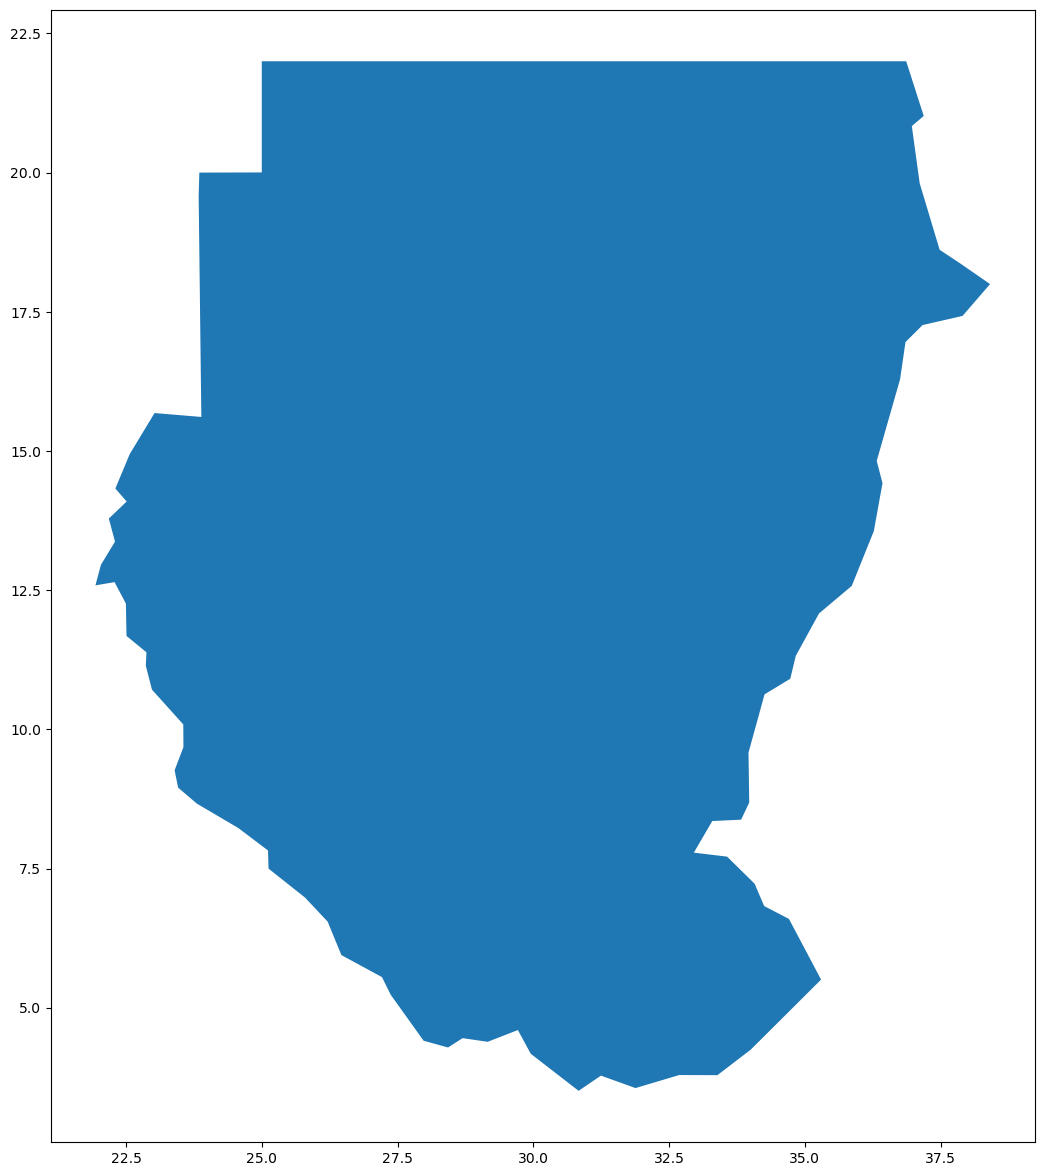

In [32]:
import warnings
warnings.filterwarnings('ignore')

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
x=world[world.name.str.contains('sudan',case=False)].geometry.buffer(0.001).unary_union
dar=darfur.geometry.buffer(0.05).unary_union
sudan = world[['geometry']].head(1)
darf = sudan.copy()
sudan['geometry']=x
darf['geometry']=dar
sudan.plot()

# Figure 5

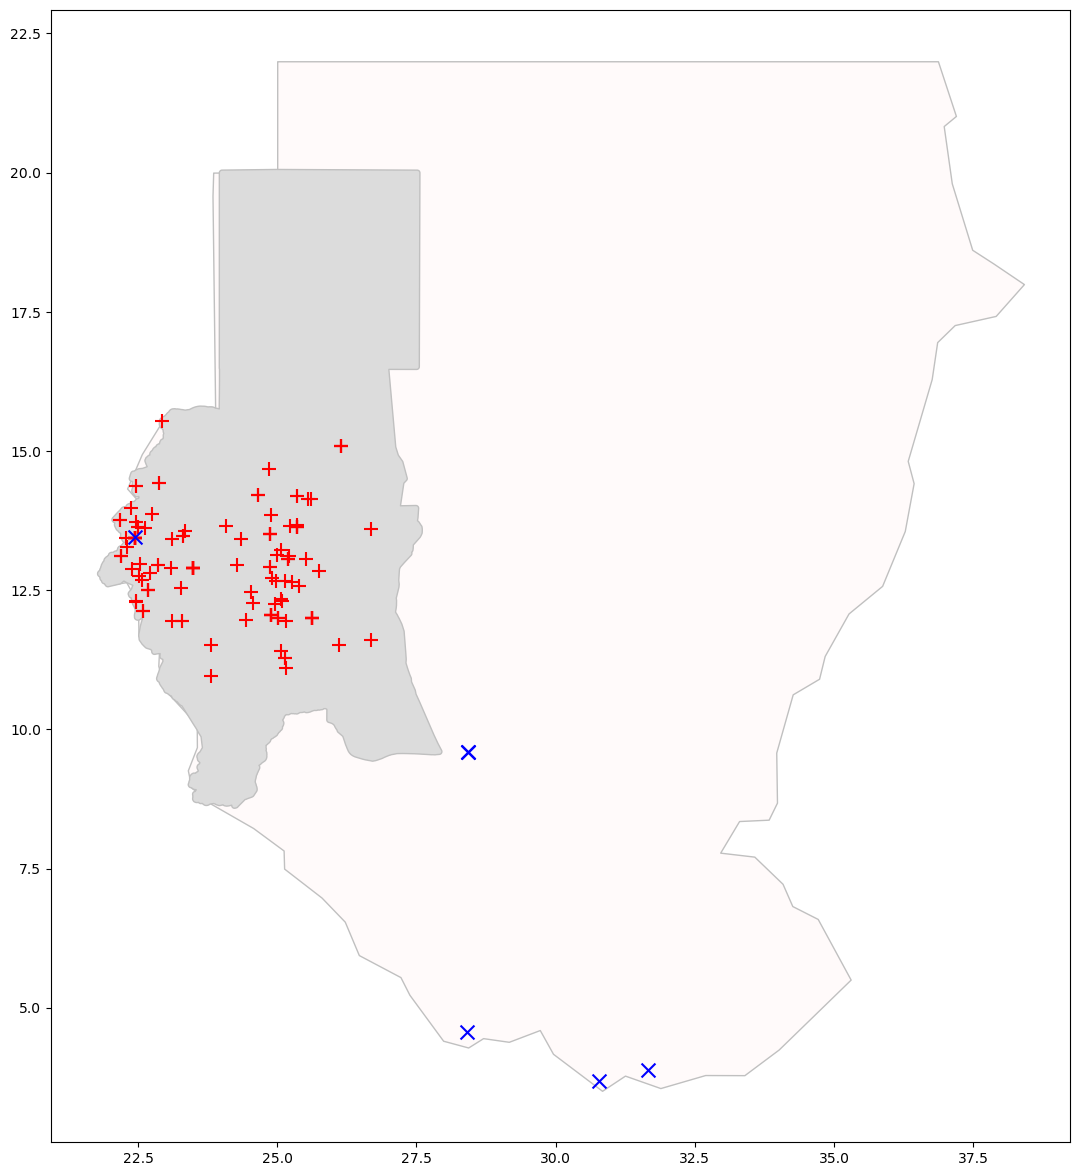

In [33]:
plt.rcParams['figure.figsize'] = [15, 15]
f, ax = plt.subplots(1)
base = sudan.plot(ax=ax,color='snow',edgecolor='silver')
base = darf.plot(ax=base, color='gainsboro', edgecolor='silver')
base = geo_jmac.plot(ax=base, color='red', marker='+', alpha=1, markersize=100)
base = geo_acled.plot(ax=base, color='blue', marker='x', alpha=1, markersize=100)
plt.savefig('Darfur/Darfur-map.pdf')

In [34]:
acled_movement

,Unnamed: 0,GWNO,EVENT_ID_CNTY,EVENT_ID_NO_CNTY,EVENT_DATE,YEAR,TIME_PRECISION,EVENT_TYPE,ACTOR1,ALLY_ACTOR_1,INTER1,ACTOR2,ALLY_ACTOR_2,INTER2,INTERACTION,COUNTRY,ADMIN1,ADMIN2,ADMIN3,LOCATION,LATITUDE,LONGITUDE,GEO_PRECIS,SOURCE,NOTES,FATALITIES,RECODE
0,82533,625,2228SUD,82534,2008-01-09,2008,1,Headquarters or base established,JEM: Justice and Equality Movement,SLM/A: Sudan Liberation Movement/Army,2,NaN,NaN,0,20,Sudan,Darfur,West Darfur,Al Geneina,El Geneina,13.450000,22.450000,2,"BBC Monitoring, Al-Ayyam; BBCMEP0020080109e419...",1. The coordinates of Geneina were used. 2. BB...,0,1
3,82549,625,2244SUD,82550,2008-01-31,2008,1,Non-violent activity by a conflict actor,LRA: Lord's Resistance Army,NaN,2,NaN,NaN,0,20,Sudan,Equatoria,Central Equatoria,Nahr Yei,Morobo,3.691900,30.776300,1,"BBC Monitoring Middle East, 01 Feb 2008 BBCMEP...",LRA moving from Morobo to Tore in S. Sudan.,0,1
5,82642,625,2338SUD,82644,2008-05-01,2008,1,Non-violent activity by a conflict actor,Military Forces of Sudan (1989-),NaN,1,Military Forces of Southern Sudan (2005-2011),NaN,1,11,Sudan,Kordofan,South Kordufan,Abyei,Abyei,9.595247,28.434934,1,Reuters Alertnet,Both SAF and SPLA/M have agreed to withdraw fr...,0,1
10,82690,625,2385SUD,82691,2008-06-06,2008,1,Non-violent activity by a conflict actor,LRA: Lord's Resistance Army,NaN,2,NaN,NaN,0,20,Sudan,Equatoria,Central Equatoria,Kajo Kaii,Kajo Kaji,3.883300,31.666600,1,BBC Monitoring,LRA said to be moving toward Kajo-Keji,0,1
11,82701,625,2396SUD,82702,2008-06-15,2008,1,Non-violent activity by a conflict actor,Military Forces of Sudan (1989-),NaN,1,Military Forces of Southern Sudan (2005-2011),NaN,1,11,Sudan,Kordofan,South Kordufan,Abyei,Abyei,9.595247,28.434934,1,Reuters Alertnet,The Joint Integrated Unit of troops from the S...,0,1
18,82716,625,2411SUD,82717,2008-07-04,2008,1,Non-violent activity by a conflict actor,Military Forces of Sudan (1989-),NaN,1,Military Forces of Southern Sudan (2005-2011),NaN,1,11,Sudan,Kordofan,South Kordufan,Abyei,Abyei,9.595247,28.434934,1,Reuters,Sudan's north and south armies have begun to w...,0,1
38,82916,625,2611SUD,82917,2009-03-04,2009,2,Non-violent activity by a conflict actor,LRA: Lord's Resistance Army,NaN,2,NaN,NaN,0,20,Sudan,Equatoria,West Equatoria,Yambio,Yambio,4.570560,28.416390,2,IRIN,Insecurity with LRA crossing border,0,1


In [35]:
acled_movement[acled_movement.EVENT_ID_CNTY=='2228SUD'].NOTES.values

array(['1. The coordinates of Geneina were used. 2. BBC describes newspaper Al-Ayyam as "liberal." 3. JEM established eight provinces and that it has further set up a judiciary system in these provinces to conduct tribal reconciliation and maintain security.'],
      dtype=object)

In [36]:
print('Done')
end_time = time.time()
print (f"Runtime is {end_time - start_time}")

Done
Runtime is 104.07168197631836
